# Homework 2

# Pricing Diamonds


The dataset contains the following features.
- price : price of the dimaond in dollars.

- carat : weight of the diamond

- cut : quality of the cut

- color : color of the diamond, J (worst) to D (best)

- clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

- x : length (mm) 

- y :  width (mm) 

- z : depth (mm) 

- depth : 2 * z / (x + y)

- table :  width of top of diamond relative to widest point



## Your job

- Try to understand the data, visualize it. You may use unsupervised learning methods at this stage.
- The main aim is then to predict, using supervised learning methods, the price of diamonds based on their different quality features.

## We want to see the following things

- Prediction results and mean squared error obtained on the test set for the methods you considered.
- A discussion about the impact of the hyperparameters of the methods on your predictions.
- A clear comparison between your solutions (a table, and/or plots comparing the results obtained with different methods).
- A discussion about the difficulties encountered if applicable.
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did efficient calibration of the methods and serious comparisons between different methods
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Hand in your assignment  before 11/11/20 23h55 :

- via Moodle for all Université de Paris students
- via email for Paris 1 students, subject [Machine Learning DM2], aurelie.fischer@univ-paris-diderot.fr


## Example of methods

Unsupervised learning methods and visualization :
- PCA
- k-means
- mixture models
- spectral clustering
...

Supervised learning methods :
- discriminant analysis
- logistic regression
- SVM
- regression trees
- bagging
- random forests
- boosting
- ...

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Permet a une cellule d'avoir plus d'un display en sortie
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamond_df.shape

(53940, 10)

In [8]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [12]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
diamond_df["cut"].unique()
diamond_df["color"].unique()
diamond_df["clarity"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [27]:
# Veryfing if we have any rows with NaN values in the dataframe
diamond_df[diamond_df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [35]:
diamond_df[['carat', 'depth', 'table', 'price']]

,carat,depth,table,price
0,0.23,61.5,55.0,326
1,0.21,59.8,61.0,326
2,0.23,56.9,65.0,327
3,0.29,62.4,58.0,334
4,0.31,63.3,58.0,335
...,...,...,...,...
53935,0.72,60.8,57.0,2757
53936,0.72,63.1,55.0,2757
53937,0.70,62.8,60.0,2757
53938,0.86,61.0,58.0,2757


# Unsupervised visualization of data

## PCA

In [31]:
pca = PCA()
pca.fit(diamond_df[['carat', 'depth', 'table', 'price']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.singular_values_

array([9.26538262e+05, 5.29379914e+02, 3.09041787e+02, 4.15914026e+01])

## K-Means

[[7.30658880e-01 6.17781384e+01 5.75730207e+01 2.65810316e+03]
 [1.93520200e+00 6.16259192e+01 5.79983205e+01 1.62006219e+04]
 [1.26922686e+00 6.17636080e+01 5.76824678e+01 7.83707653e+03]
 [1.05525052e+00 6.18285921e+01 5.79691925e+01 4.92016304e+03]
 [1.58646789e+00 6.16632110e+01 5.78087156e+01 1.16262920e+04]
 [3.87204593e-01 6.17224309e+01 5.70236637e+01 9.32115626e+02]]


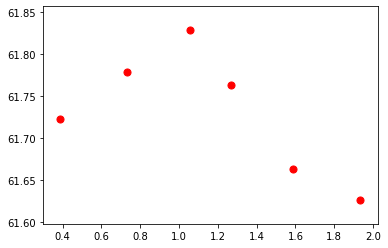

In [38]:
kmeans = KMeans(n_clusters=6).fit(diamond_df[['carat', 'depth', 'table', 'price']])
centroids = kmeans.cluster_centers_
print(centroids)

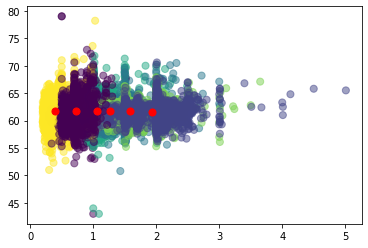

In [40]:
plt.scatter(diamond_df['carat'], diamond_df['depth'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()